# CAR PRICE PREDICTION

## Load the dataset

In [180]:
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
model = LinearRegression()
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [181]:
car_df = pd.read_csv("C:/Users/deeps/OneDrive/Documents/WEBSTER/DATASET/carprices.csv")
car_df

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


## Data Exploration

In [182]:
car_df.dtypes

Car Model        object
Mileage           int64
Sell Price($)     int64
Age(yrs)          int64
dtype: object

In [183]:
car_df.describe()

,Mileage,Sell Price($),Age(yrs)
count,25.000000,25.000000,25.000000
mean,62840.000000,26408.000000,5.120000
std,19375.521498,7841.551717,1.691153
min,22500.000000,12000.000000,2.000000
25%,52000.000000,20000.000000,4.000000
50%,66000.000000,25000.000000,5.000000
75%,79000.000000,33000.000000,6.000000
max,99000.000000,40000.000000,8.000000


In [184]:
car_df.groupby("Car Model").mean()

,Mileage,Sell Price($),Age(yrs)
Car Model,,,
Audi A5,70571.428571,23657.142857,5.571429
BMW X5,43875.000000,31575.000000,3.500000
Mercedez Benz C class,72600.000000,24200.000000,6.100000


In [185]:
car_df.groupby("Car Model").median()

,Mileage,Sell Price($),Age(yrs)
Car Model,,,
Audi A5,71000.0,19900.0,5.0
BMW X5,40750.0,32750.0,3.0
Mercedez Benz C class,74500.0,22000.0,6.0


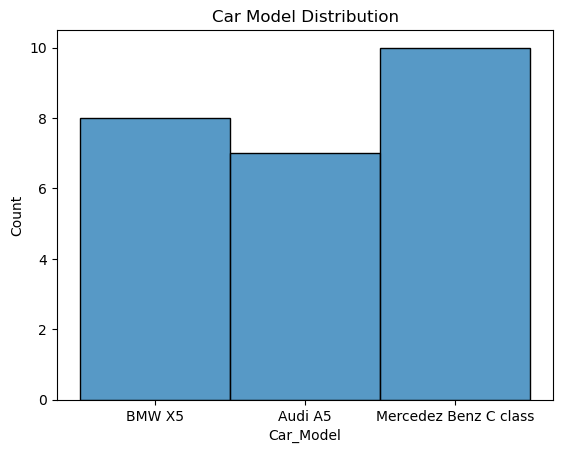

In [186]:
car_df.rename(columns={'Car Model':'Car_Model'}, inplace=True)
sns.histplot(car_df.Car_Model)
plt.title('Car Model Distribution')
plt.show()

In [187]:
car_df.value_counts()

Car_Model              Mileage  Sell Price($)  Age(yrs)
Audi A5                50000    38000          4           1
BMW X5                 57000    26100          5           1
Mercedez Benz C class  83000    20000          7           1
                       80000    22000          7           1
                       79000    25000          5           1
                                21000          7           1
                       70000    21000          6           1
                       67000    22000          6           1
                       66000    23000          6           1
                       59000    33000          5           1
                       58000    35000          4           1
BMW X5                 69000    18000          6           1
                       56000    30000          3           1
Audi A5                52000    32000          5           1
BMW X5                 46000    31500          4           1
                       35500 

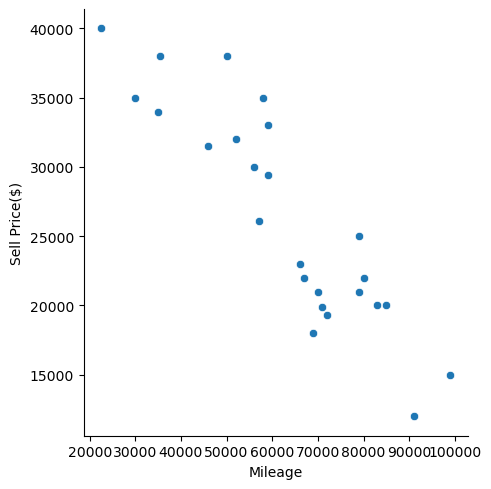

In [188]:
sns.relplot(data=car_df, x='Mileage', y='Sell Price($)')

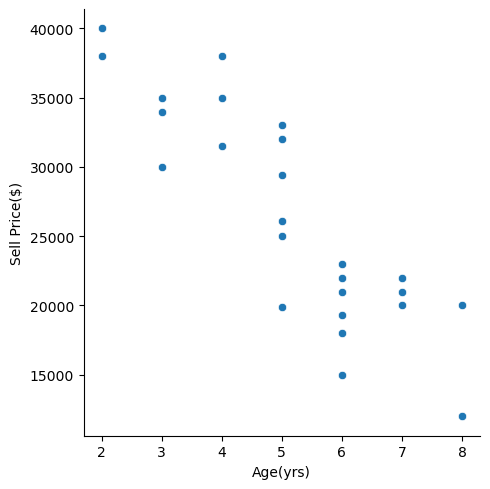

In [189]:
sns.relplot(data=car_df, x='Age(yrs)', y='Sell Price($)')

## Data Preparation

In [190]:
dummies = pd.get_dummies(car_df['Car_Model'])
dummies

,Audi A5,BMW X5,Mercedez Benz C class
0,False,True,False
1,False,True,False
2,False,True,False
3,False,True,False
4,False,True,False
5,True,False,False
6,True,False,False
7,True,False,False
8,True,False,False
9,False,False,True


In [191]:
# Assuming your DataFrame is named df
dummies = dummies.astype(int)
dummies

,Audi A5,BMW X5,Mercedez Benz C class
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
5,1,0,0
6,1,0,0
7,1,0,0
8,1,0,0
9,0,0,1


In [192]:
combined = pd.concat([car_df,dummies],axis='columns') 
combined

,Car_Model,Mileage,Sell Price($),Age(yrs),Audi A5,BMW X5,Mercedez Benz C class
0,BMW X5,69000,18000,6,0,1,0
1,BMW X5,35000,34000,3,0,1,0
2,BMW X5,57000,26100,5,0,1,0
3,BMW X5,22500,40000,2,0,1,0
4,BMW X5,46000,31500,4,0,1,0
5,Audi A5,59000,29400,5,1,0,0
6,Audi A5,52000,32000,5,1,0,0
7,Audi A5,72000,19300,6,1,0,0
8,Audi A5,91000,12000,8,1,0,0
9,Mercedez Benz C class,67000,22000,6,0,0,1


In [193]:
combined.describe()

,Mileage,Sell Price($),Age(yrs),Audi A5,BMW X5,Mercedez Benz C class
count,25.000000,25.000000,25.000000,25.000000,25.000000,25.0
mean,62840.000000,26408.000000,5.120000,0.280000,0.320000,0.4
std,19375.521498,7841.551717,1.691153,0.458258,0.476095,0.5
min,22500.000000,12000.000000,2.000000,0.000000,0.000000,0.0
25%,52000.000000,20000.000000,4.000000,0.000000,0.000000,0.0
50%,66000.000000,25000.000000,5.000000,0.000000,0.000000,0.0
75%,79000.000000,33000.000000,6.000000,1.000000,1.000000,1.0
max,99000.000000,40000.000000,8.000000,1.000000,1.000000,1.0


In [194]:
final_car = combined.drop(['Car_Model'], axis='columns')
final_car

,Mileage,Sell Price($),Age(yrs),Audi A5,BMW X5,Mercedez Benz C class
0,69000,18000,6,0,1,0
1,35000,34000,3,0,1,0
2,57000,26100,5,0,1,0
3,22500,40000,2,0,1,0
4,46000,31500,4,0,1,0
5,59000,29400,5,1,0,0
6,52000,32000,5,1,0,0
7,72000,19300,6,1,0,0
8,91000,12000,8,1,0,0
9,67000,22000,6,0,0,1


## Model building

In [195]:
### USing entire dataset for model building.

In [196]:
## Dropping sell price column from predictors as it is a target variable.
X = final_car.drop('Sell Price($)', axis='columns')
X

,Mileage,Age(yrs),Audi A5,BMW X5,Mercedez Benz C class
0,69000,6,0,1,0
1,35000,3,0,1,0
2,57000,5,0,1,0
3,22500,2,0,1,0
4,46000,4,0,1,0
5,59000,5,1,0,0
6,52000,5,1,0,0
7,72000,6,1,0,0
8,91000,8,1,0,0
9,67000,6,0,0,1


In [197]:
Y  = final_car[['Sell Price($)']]
Y

,Sell Price($)
0,18000
1,34000
2,26100
3,40000
4,31500
5,29400
6,32000
7,19300
8,12000
9,22000


In [198]:
## fitting linear regression
model.fit(X,Y)

LinearRegression()

In [199]:
model.predict(X)

array([[18678.01574345],
       [35262.93930597],
       [24398.27900102],
       [41127.1691161 ],
       [29830.6091535 ],
       [28283.26364269],
       [30298.79537843],
       [22275.06728   ],
       [12274.20629038],
       [26038.93198822],
       [19166.93631022],
       [20318.66873065],
       [30607.46282538],
       [33160.46192679],
       [26326.86509333],
       [20030.73562554],
       [25175.13267291],
       [16326.0041037 ],
       [24848.80072326],
       [24828.06638142],
       [14500.87344215],
       [37384.03874972],
       [29216.34409875],
       [36702.6048315 ],
       [33139.72758495]])

### Tell me the score (accuracy) of your model

In [200]:
model.score(X,Y)

0.9006591109002584

### 1) Predict price of a mercedez benz that is 5 yr old with mileage 45000

In [201]:
model.predict([[45000,5,0,0,1]])

array([[34638.52629686]])

### 2) Predict price of a BMW X5 that is 7 yr old with mileage 96000.

In [202]:
model.predict([[86000,7,0,1,0]])

array([[11518.08696034]])

### 3) Predict price of a Audi A5 car that is 4 yr old with mileage 80000.

In [203]:
model.predict([[80000,4,1,0,0]])

array([[24501.73443177]])

### 3) Predict price of a mercedez benz car that is 1 yr old with mileage 50000.

In [204]:
model.predict([[50000,1,0,0,1]])

array([[42259.12475656]])